<img width=700px; src="../img/logoUPSayPlusCDS_990.png">

<p style="margin-top: 3em; margin-bottom: 2em;"><b><big><big><big><big>Introduction to Scipy and Statsmodels libraries</big></big></big></big></b></p>

In [44]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

The SciPy library is one of the core packages that make up the SciPy stack. It provides many user-friendly and efficient numerical routines such as routines for numerical integration and optimization.

## 1. File input/output - `scipy.io`

Scipy provides an `io` module to help load some data type. We can easily read MATLAB `.mat` files using `io.loadmat` and `io.savemat`.

In [22]:
from scipy.io import loadmat, savemat
a = np.ones((3, 3))
savemat('file.mat', {'a': a}) # savemat expects a dictionary
data = loadmat('file.mat', struct_as_record=True)
data['a']

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

<div class="alert alert-success">

<b>EXERCISE - `scipy.io`</b>:

 <ul>
  <li>Load the matfile from `data/spectra.mat` using `scipy.io.loadmat`.</li>
  <li>Extract from the loaded dictionary two variables (`spectra`, `frequency`). You should call `ravel` the `frequency` array to obtain a 1-D array.</li>
  <li>Plot the spectra in function of the frequency.</li>
</ul>

</div>

In [23]:
data = loadmat('data/spectra.mat', struct_as_record=True)

In [24]:
data

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sun Jul  2 10:28:00 2017',
 '__version__': '1.0',
 '__globals__': [],
 'spectra': array([[0.0152963, 0.0152944, 0.0153142, ..., 0.017305 , 0.0170706,
         0.0172018],
        [0.0143634, 0.0143292, 0.0143999, ..., 0.018519 , 0.0186104,
         0.0187633],
        [0.0163027, 0.0161848, 0.0163573, ..., 0.017772 , 0.0179032,
         0.0175998],
        ...,
        [0.0145195, 0.014399 , 0.0143937, ..., 0.0176497, 0.0174543,
         0.0174893],
        [0.0157462, 0.015478 , 0.0154057, ..., 0.0177981, 0.0178682,
         0.0179989],
        [0.0160526, 0.0163989, 0.0162803, ..., 0.0182082, 0.0180114,
         0.0182391]]),
 'frequency': array([[ 400.095,  402.626,  405.155, ..., 3996.41 , 3997.88 , 3999.36 ]])}

In [25]:
data['spectra']

array([[0.0152963, 0.0152944, 0.0153142, ..., 0.017305 , 0.0170706,
        0.0172018],
       [0.0143634, 0.0143292, 0.0143999, ..., 0.018519 , 0.0186104,
        0.0187633],
       [0.0163027, 0.0161848, 0.0163573, ..., 0.017772 , 0.0179032,
        0.0175998],
       ...,
       [0.0145195, 0.014399 , 0.0143937, ..., 0.0176497, 0.0174543,
        0.0174893],
       [0.0157462, 0.015478 , 0.0154057, ..., 0.0177981, 0.0178682,
        0.0179989],
       [0.0160526, 0.0163989, 0.0162803, ..., 0.0182082, 0.0180114,
        0.0182391]])

In [32]:
data['frequency'].shape

(1, 1866)

In [33]:
data['frequency'][0,:].shape

(1866,)

In [35]:
import numpy as np
np.ravel(data['frequency'], 'C').shape

(1866,)

In [42]:
data['spectra'].shape

(190, 1866)

In [43]:
data['spectra'][0,:]

array([0.0152963, 0.0152944, 0.0153142, ..., 0.017305 , 0.0170706,
       0.0172018])

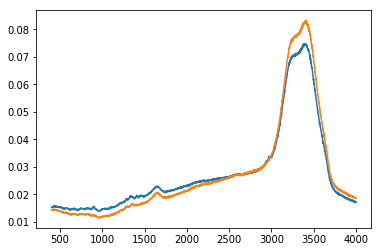

In [49]:
plt.plot( data['frequency'][0,:], data['spectra'][0,:])
plt.plot( data['frequency'][0,:], data['spectra'][1,:])

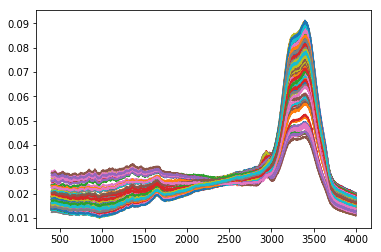

In [52]:
for i in range(data['spectra'].shape[0]):
    plt.plot( data['frequency'][0,:], data['spectra'][i,:])

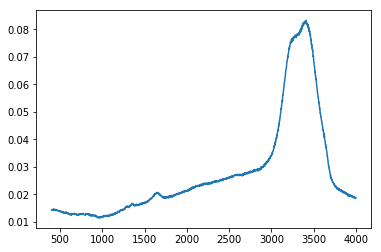

In [48]:
plt.plot( data['frequency'][0,:], data['spectra'][1,:])

In [56]:
data['frequency'][0,:].astype('int')

(1866,)

## 2. Signal interpolation - `scipy.interpolate`

The scipy.interpolate is useful for fitting a function from experimental data and thus evaluating points where no measure exists. By imagining experimental data close to a sine function:

In [37]:
measured_time = np.linspace(0, 1, 10)
noise = (np.random.random(10)*2 - 1) * 1e-1
measures = np.sin(2 * np.pi * measured_time) + noise

The `scipy.interpolate.interp1d` class can build a linear interpolation function:

In [38]:
from scipy.interpolate import interp1d
linear_interp = interp1d(measured_time, measures)

Then the `scipy.interpolate.linear_interp` instance needs to be evaluated at the time of interest:

In [39]:
computed_time = np.linspace(0, 1, 50)
linear_results = linear_interp(computed_time)

A cubic interpolation can also be selected by providing the `kind` optional keyword argument:

In [40]:
cubic_interp = interp1d(measured_time, measures, kind='cubic')
cubic_results = cubic_interp(computed_time)

Let's see the difference by plotting the results.

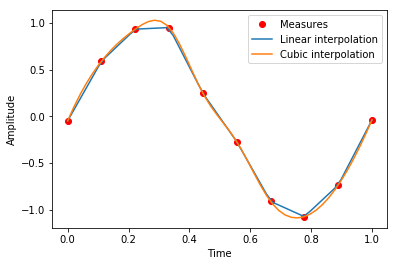

In [41]:
plt.plot(measured_time, measures, 'or', label='Measures')
plt.plot(computed_time, linear_results, label='Linear interpolation')
plt.plot(computed_time, cubic_results, label='Cubic interpolation')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

<div class="alert alert-success">

<b>EXERCISE - `scipy.interpolate`</b>:

 <ul>
  <li>Interpolate each spectra values corresponding to the integral frequencies {401, 402, ..., 3999} using `scipy.interpolate.interp1d`.</li>
  <li>Plot the spectra in function of the frequencies.</li>
</ul>

</div>

In [69]:
freq =data['frequency'][0,:]

In [59]:
data['frequency'][0,:]

array([ 400.095,  402.626,  405.155, ..., 3996.41 , 3997.88 , 3999.36 ])

In [73]:
from scipy.interpolate import interp1d
linear_interp = interp1d(freq, data['spectra'][0,:])

In [74]:
#print x values i.e. frequencies
print(linear_interp.x)
# print y values i.e. spectra
print(linear_interp.y)

[ 400.095  402.626  405.155 ... 3996.41  3997.88  3999.36 ]
[0.0152963 0.0152944 0.0153142 ... 0.017305  0.0170706 0.0172018]


In [76]:
freq_int =data['frequency'][0,:].astype('int')
freq_int[0]=401
linear_results = linear_interp(freq_int)

In [77]:
linear_results

array([0.01529562, 0.01529487, 0.01531299, ..., 0.01734045, 0.01721092,
       0.01716989])

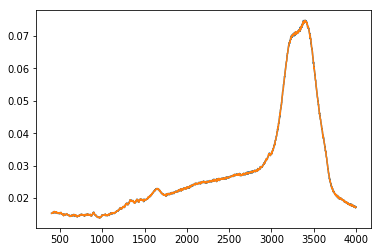

In [80]:
plt.plot( data['frequency'][0,:], data['spectra'][0,:])
plt.plot( freq_int, linear_results)

In [86]:
nspectra = data['spectra'].shape[0]
nfreq = data['spectra'].shape[1]
result_spectra = np.zeros((nspectra,nfreq))

In [87]:
result_spectra

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [88]:
freq_int =data['frequency'][0,:].astype('int')
freq_int[0]=401
for i in range(nspectra):
    linear_interp = interp1d(freq, data['spectra'][i,:])
    result_spectra[i,:] = linear_interp(freq_int)

In [91]:
result_spectra.shape

(190, 1866)

In [95]:
print(freq_int[4:7])
result_spectra[::10,4:7]

[410 412 415]


array([[0.01550607, 0.01554446, 0.01559222],
       [0.02304283, 0.02301972, 0.02346353],
       [0.01795838, 0.01789572, 0.01763386],
       [0.02535394, 0.02532898, 0.02531225],
       [0.01367022, 0.01358501, 0.01372241],
       [0.01876713, 0.01874582, 0.01900656],
       [0.01929296, 0.0191357 , 0.01915579],
       [0.01384247, 0.01369523, 0.01383032],
       [0.01326565, 0.01328914, 0.01363981],
       [0.01777929, 0.01781275, 0.01794523],
       [0.02060914, 0.02045781, 0.02062953],
       [0.01760502, 0.01760551, 0.0177139 ],
       [0.02845185, 0.0282128 , 0.02786759],
       [0.01637557, 0.01647289, 0.01627965],
       [0.01639167, 0.01654387, 0.01655974],
       [0.01791956, 0.01808867, 0.01802987],
       [0.01431332, 0.01436296, 0.01457787],
       [0.01464144, 0.01452652, 0.01454812],
       [0.01366555, 0.0137008 , 0.01375051]])

[ 400.095  550.451  697.855  842.389  984.135 1123.17  1259.58  1393.42
 1524.77  1653.69  1780.26  1904.53  2026.56  2146.42  2264.15  2379.82
 2493.48  2605.17  2714.02  2822.33  2928.83  3033.55  3136.54  3237.85
 3337.5   3435.54  3532.01  3626.94  3720.37  3812.33  3902.86  3991.99 ]


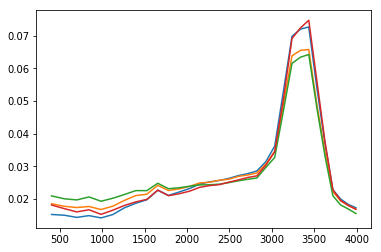

In [103]:
print( data['frequency'][0,::60])
for i in range(0,nspectra,50):
    plt.plot( data['frequency'][0,::60], result_spectra[i,::60])

## 3. Optimization - `scipy.optimize`

Optimization is the problem of finding a numerical solution to a minimization or equality.

The scipy.optimize module provides useful algorithms for function minimization (scalar or multi-dimensional), curve fitting and root finding.

In [8]:
from scipy import optimize

### Finding the minimum of a scalar function

Let’s define the following function:

In [9]:
def f(x):
    return x ** 2 + 10 * np.sin(x)

and plot it:

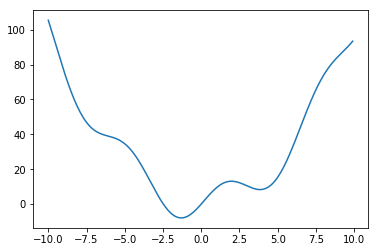

In [10]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x))
plt.show()

This function has a global minimum around -1.3 and a local minimum around 3.8.

The general and efficient way to find a minimum for this function is to conduct a gradient descent starting from a given initial point. The BFGS algorithm is a good way of doing this:

In [11]:
res = optimize.minimize(f, 0, method='L-BFGS-B')
res

      fun: array([-7.94582338])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.42108547e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 12
      nit: 5
   status: 0
  success: True
        x: array([-1.30644013])

A possible issue with this approach is that, if the function has local minima the algorithm may find these local minima instead of the global minimum depending on the initial point:

In [12]:
res2 = optimize.minimize(f, 3, method='L-BFGS-B')
res2

      fun: array([8.31558558])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.77635684e-07])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 14
      nit: 6
   status: 0
  success: True
        x: array([3.83746709])

If we don’t know the neighborhood of the global minimum to choose the initial point, we need to resort to costlier global optimization. To find the global minimum, we use `scipy.optimize.basinhopping()` (which combines a local optimizer with stochastic sampling of starting points for the local optimizer):

In [13]:
optimize.basinhopping(f, 3, niter=1000)

                        fun: -7.9458233756152845
 lowest_optimization_result:       fun: -7.9458233756152845
 hess_inv: array([[0.08584092]])
      jac: array([2.98023224e-07])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([-1.30644])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 18642
                        nit: 1000
                       njev: 6214
                          x: array([-1.30644])

### Finding the roots of a scalar function

To find a root, i.e. a point where $f(x) = 0$, of the function f above we can use for example `scipy.optimize.fsolve()`:

In [14]:
root = optimize.fsolve(f, 1)  # our initial guess is 1
root

array([0.])

Note that only one root is found. Inspecting the plot of f reveals that there is a second root around -2.5. We find the exact value of it by adjusting our initial guess:

In [15]:
root2 = optimize.fsolve(f, -2.5)
root2

array([-2.47948183])

### Curve fitting

Suppose we have data sampled from $f$ with some noise:

In [16]:
xdata = np.linspace(-10, 10, num=100)
ydata = f(xdata) + np.random.normal(0, 2, xdata.shape)

Now if we know the functional form of the function from which the samples were drawn ($x^2 + \sin(x)$ in this case) but not the amplitudes of the terms, we can find those by least squares curve fitting. First we have to define the function to fit:

In [17]:
def f2(x, a, b):
    return a*x**2 + b*np.sin(x)

Then we can use `scipy.optimize.curve_fit()` to find $a$ and $b$:

In [18]:
guess = [2, 2]
params, params_covariance = optimize.curve_fit(f2, xdata, ydata, guess)
params

array([ 0.99652892, 10.34449375])

### Summary in a single plot

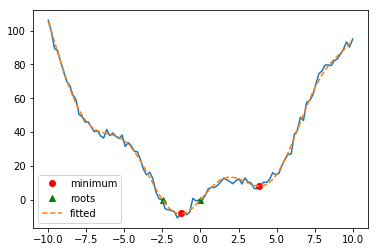

In [19]:
x = np.arange(-10, 10, 0.1)
plt.plot(xdata, ydata)
# plot the local minima
plt.plot(res.x, f(res.x), 'or', label='minimum')
plt.plot(res2.x, f(res2.x), 'or')
# plot the roots
plt.plot(root, f(root), '^g', label='roots')
plt.plot(root2, f(root2), '^g')
# plot the curved fitted
plt.plot(x, f2(x, params[0], params[1]), '--', label='fitted')
plt.legend()
plt.show()

<div class="alert alert-success">

<b>EXERCISE - `scipy.optimize`</b>:

The previous spectra can be modelled using a simple function `model_bi_functions` which we defined as:

<br><br>

$$
    S(f)=\left\{
                \begin{array}{ll}
                  a f + b, & 0 < f < \mu - 3 \sigma \\
                  (a (\mu - 3 \sigma) + b) + \exp\left( - \frac{(f - \mu)^{2}}{2 \sigma^{2}} \right), & f \geq \mu - 3 \sigma\\
                \end{array}
              \right.
$$

See below a plot which illustrate the profile of this function.

 <ul>
  <li>Using `scipy.optimize.curve_fit`, fit `model_bi_functions` in the first spectra from `spectra_interp`. You also have to use `frequency_interp` as `x` values. Use the initial parameters `[0.0, 0.01, 100, 3300, 300]`</li>
  <li>Plot the results.</li>
</ul>

</div>

In [20]:
# import helper regarding normal distribution
from scipy.stats import norm

def find_nearest_index(array, value):
    """Find the nearest index of a value in an array."""
    idx = (np.abs(array - value)).argmin()
    return idx

def model_bi_functions(freqs, a=1e-5, b=0.01,
                      scale=100, mu=3300, sigma=300):
    """Model to be fitted.
    
    It corresponds to a line from [0, f0] and a
    Normal distribution profile from [f0, end].
    
    Parameters
    ----------
    freqs : ndarray, shape (n_freqs,)
        Frequencies for which the spectrum will be calculated
        
    a : float, (default=1e-5)
        Slope of the line.
        
    b : float, (default=0.01)
        Values where the line cut the y-axis.
        
    scale : float, (default=100)
        Scaling factor for the amplitude of the Gaussian profile.
        
    mu : float, (default=3300)
        Central value of the Gaussian profile.
        
    sigma : float, (default=300)
        Standard deviation of the Gaussian profile.
    
    """
    y = np.zeros(freqs.shape)
    # find the index of the inflexion point
    f0_idx = find_nearest_index(freqs, mu - 3 * sigma)
    # line equation
    y[:f0_idx] = a * freqs[:f0_idx] + b
    # Gaussian profile
    y[f0_idx:] = ((a * freqs[f0_idx] + b) +
                  (scale * norm.pdf(freqs[f0_idx:], mu, sigma)))
    return y

In [21]:
y = model_bi_functions(frequency_interp)
plt.plot(frequency_interp, y)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

NameError: name 'frequency_interp' is not defined

## 4. Numerical integration - `scipy.integrate`

Given a function object, the most generic integration routine is `scipy.integrate.quad()`.

In [ ]:
from scipy.integrate import quad
res, err = quad(np.sin, 0, np.pi / 2)
res

If only fixed sample are given, the trapeze method (`scipy.integrate.trapz()`) or Simpson's integration rule `scipy.integrate.simps()`) can be used.

In [ ]:
x = np.linspace(0, np.pi / 2, num=200)
y = np.sin(x)

In [ ]:
from scipy.integrate import simps
res = simps(y, x)
res

<div class="alert alert-success">

<b>EXERCISE - `scipy.integrate`</b>:

We would be interested in the area under the Gaussian profile since it is related to what we want to quantify.

 <ul>
  <li>Using `scipy.integrate.simps`, compute the area under the Gaussian profile between $[\mu - 3 \sigma, \mu + 3 \sigma]$. Those parameters can be found as the results of the curve fitting previusly done. The indexes corresponding to the interval values can be computed using `find_nearest_index`.</li>
  <li>You can do the same using the original data to see the difference od quantification.</li>
</ul>

</div>

## 5. Linear algebra - `scipy.linalg`

The `scipy.linalg` offers basic operation used in linear algebra such as inverse (`scipy.linalg.inv`), pseudo-inverse (`scipy.linalg.pinv`), determinant (`scipy.linalg.det`) as well as decompostion as standard decompisition as SVD, QR, or Cholesky among others.

<div class="alert alert-warning">

<b>`np.array` vs. `np.matrix`:</b>

<br><br>

By default the multiplication between two `np.array` (i.e. `*` operator) do not lead to a matrix multiplication. You need to use `np.dot` to perform this operation.

<br><br>

Another possibility is to convert the `np.array` to `np.matrix` which perform this operation when using the operator `*`. The operations become more readable when there is a lot of algebric operations involved.

<br><br>

We illustrate this behaviour in the example below.

</div>

Let's declare two arrays of shape $3 \times 3$ and $3 \times 1$, respectively.

In [ ]:
A = np.array([[ 3,  3, -1],
              [ 2, -3,  4],
              [-1, .5, -1]])

b = np.array([[ 1],
              [-2],
              [ 0]])

Using the `*` operator does not lead to a matrix multiplication since the matrix returned is a $3 \times 3$ matrix. Instead, it multiply each column of $A$ by the vector $b$.

In [ ]:
A * b

You need to use the function `np.dot` to obtain the matrix multiplication.

In [ ]:
np.dot(A, b)

However, by converting $A$ and $b$ to matrices (i.e., `np.matrix`), it is possible to use the `*` operator directly.

In [ ]:
A = np.matrix(A)
b = np.matrix(b)

A * b

<div class="alert alert-success">

<b>EXERCISE - `scipy.linalg`</b>:

 <ul>
  <li>Solve the following system of linear equations using the normal equation.</li>
</ul>
<br>

$$
\left[\begin{array}{cc} 
3x & 3y & -z \\
2x & -3y & 4z \\
-x & .5y & -z
\end{array}\right]
\left[\begin{array}{cc} 
x_1 \\ 
x_2 \\
x_3
\end{array}\right] = 
\left[\begin{array}{cc} 
-1 \\ 
-2 \\
0
\end{array}\right]
$$

This problem can be seen as:
$$ A x = b $$

$x$ can be find such that:

$$ x = (A^{T} A)^{-1} A^{T} b $$

Find $x$ using the above equation

</div>

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Solve the following system of linear equations using SVD.</li>
</ul>
<br>

The above problem can also be solved using an SVD decomposition such that:

$$ x = V S^{-1} (U^{T} b) $$

where $U$, $S$, and $V^{T}$ can be found with `scipy.linalg.svd` such that:
`U, S, Vh = svd(A)`

</div>

## 6. Statistics - `scipy.stats` and `statsmodel`

### `scipy.stats`

`scipy.stats` contains mainly helper of most common [continuous](https://docs.scipy.org/doc/scipy/reference/stats.html#continuous-distributions) and [discrete](https://docs.scipy.org/doc/scipy/reference/stats.html#discrete-distributions) distribution.

In addition, this module contain statistical functions to perform statistical tests for instance.

In [ ]:
import pandas as pd
data = pd.read_csv('data/brain_size.csv', sep=';', na_values=".")
data.head()

#### 1-sample t-test

`scipy.stats.ttest_1samp()` tests if the population mean of data is likely to be equal to a given value. Let see if the VIQ of our population is equal to 0.

In [ ]:
from scipy.stats import ttest_1samp

ttest_1samp(data['VIQ'], 0)

With a p-value of $10^{-28}$ we can claim that the population mean for the IQ (VIQ measure) is not 0.

#### 2-sample t-test

`scipy.stats.ttest_ind()` can compare two populations and check if the difference is significant or not. We can study if there is a difference of the VIQ between Male and Female.

In [ ]:
groupby_gender = data.groupby('Gender')
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

To see if this difference is significant, we can use `scipy.stats.ttest_ind()`.

In [ ]:
from scipy.stats import ttest_ind
female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']
ttest_ind(female_viq, male_viq)

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Test the difference between weights in males and females. You can fill the missing data using `pandas.fillna()` and using the mean weight of the population.</li>
  <li>Use non parametric statistics to test the difference between VIQ in males and females (refer to `scipy.stats.mannwhitneyu`).</li>
</ul>
<br>

</div>

### `statsmodels`

Given two set of observations, x and y, we want to test the hypothesis that y is a linear function of x. In other terms:
$$
    y = x \times coef + intercept + e
$$
where e is observation noise. We will use the statsmodels module to:

- Fit a linear model. We will use the simplest strategy, ordinary least squares (OLS).
- Test that coef is non zero.

In [ ]:
x = np.linspace(-5, 5, 20)
np.random.seed(1)
# normal distributed noise
y = -5 + 3 * x + 4 * np.random.normal(size=x.shape)
# Create a data frame containing all the relevant variables
data = pd.DataFrame({'x': x, 'y': y})

Then we specify an OLS model and fit it:

In [ ]:
from statsmodels.formula.api import ols
model = ols("y ~ x + 1", data).fit()

We can inspect the various statistics derived from the fit:

In [ ]:
print(model.summary())

**Intercept:** We can remove the intercept using - 1 in the formula, or force the use of an intercept using + 1.

Let's see another example: is VIQ can be predicted using Gender.

In [ ]:
from statsmodels.formula.api import ols
data = pd.read_csv('data/brain_size.csv', sep=';', na_values=".")
model = ols("VIQ ~ Gender + 1", data).fit()
print(model.summary())

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Run an OLS to check if Weight can be predicted using Gender and Height.</li>
</ul>
<br>

</div>